<div style="border:solid Chocolate 2px; padding: 40px">

<b>Андрей, привет!</b>

Меня зовут Евгений Головин, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

В ходе работы я оставил тебе комментарии <font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 Решение на этом шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев мой комментарий, не удаляй его, он будет очень полезен в случае повторной проверки работы :)
    
<div class="alert alert-info">
<b>А свой помечай вот так, чтобы я его не потерял ;)</b> 
</div>
    
На мои комменатрии можно и нужно реагировать, только делать это стоит так, чтобы твои и мои комменты не смешались: выделяй свои цветами, сильно отличающимися от моих.
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Супер, что импортируешь бибилотеки в отдельной ячейке, но лучше это сделать после введения) 

# Статистический анализ данных о поездках GoFast.

Были получены данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки абонентская плата отсутствует; стоимость одной минуты поездки 8 рублей; стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra абонентская плата — 199 рублей в месяц;стоимость одной минуты поездки — 6 рублей; стоимость старта — бесплатно.


Описание данных. В основных данных есть информация о пользователях, их поездках и подписках.
Пользователи — users_go.csv
- user_id	уникальный идентификатор пользователя
- name	имя пользователя
- age	возраст
- city	город
- subscription_type	тип подписки (free, ultra)

Поездки — rides_go.csv
- user_id	уникальный идентификатор пользователя
- distance	расстояние, которое пользователь проехал в текущей сессии (в метрах)
- duration	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- date	дата совершения поездки

Подписки — subscriptions_go.csv
- subscription_type	тип подписки
- minute_price	стоимость одной минуты поездки по данной подписке
- start_ride_price	стоимость начала поездки
- subscription_fee	стоимость ежемесячного платежа

<div class="alert alert-info">
<b> В целом я скопировал описание данных с задания , но не знаю насколько уместно.</b> 
</div>

План работы следующий:
- В первой главе загрузим данные их структуру и типы , количество , наличие пропусков.
- Во второй главе проведем предобработку данных. Если нужно поменяем типы данных. Обработаем дубликаты и аномалии.
- В третей главе рассмотрим подробнее распределение пельзователей по городам, а так же распределние длительности и расстояния пройденного за поездку.
- В 4 главе объеденим данные таблиц поездок и пользователей и посмотрим особенности поездок пользователей с подпиской и без нее. 
- В 5й посчитаем ежемесячную выручку с каждого пользователя 
- В 6й главе проверим несколько гипотез.
- В 7Й решаем дополнительные вопросы.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А добавим название проекта? Поставим цель, опишем данные, с которыми будем работать? 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Уместно) Описание данных спокойной можно брать из ТЗ) 

#### Шаг 1. Загрузка данных

Загрузим данные и посмотрим на них и статистику по ним, нарисуем гистограмы по численным столбцам.

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import math
from matplotlib import pyplot as plt

In [3]:
users = pd.read_csv('/datasets/users_go.csv')
rides =  pd.read_csv('/datasets/rides_go.csv')
sbsc = pd.read_csv('/datasets/subscriptions_go.csv')


In [4]:
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Text(0, 0.5, 'Число пользователей')

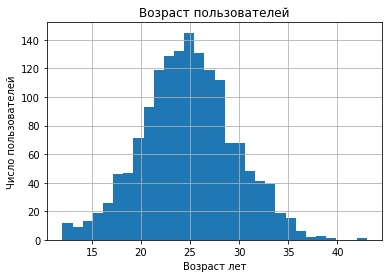

In [60]:
users['age'].hist(bins=30)
plt.title('Возраст пользователей')
plt.xlabel('Возраст лет')
plt.ylabel('Число пользователей')

In [7]:
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


<div class="alert alert-info">
<b>Тут я просто вывожу исходный датафрейм , по этому вроде подписывать смысла нет. Но как это сделать если понадобится? Если я как и везде ниже добавляю подписи они появляются только у второго графика. то есть надо как то список названий осей и графиков передавать, но как это сделать найти не смог. </b> 
</div>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Отправляю полезные ссылки) https://habr.com/ru/companies/skillfactory/articles/683738/ 
https://devpractice.ru/matplotlib-lesson-3-3-text-elements/

/tmp/ipykernel_31/3557760335.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
/tmp/ipykernel_31/3557760335.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(122)


Text(0, 0.5, 'Число поездок')

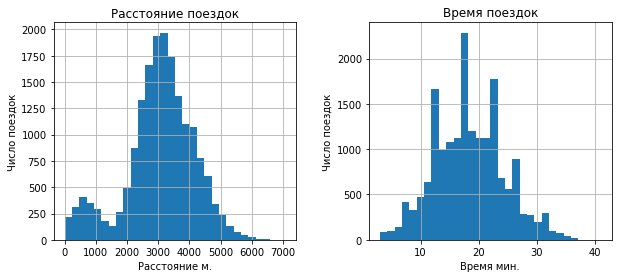

In [66]:
rides[['distance','duration']].hist(bins=30, figsize=[10,4])
plt.subplot(1,2,1)
plt.title('Расстояние поездок')
plt.xlabel('Расстояние м.')
plt.ylabel('Число поездок')
plt.subplot(122)
plt.title('Время поездок')
plt.xlabel('Время мин.')
plt.ylabel('Число поездок')

In [10]:
sbsc.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<font color='blue'>
Сохраним на будущеее количество исходных данных о поездках и пользователях
</font>

In [11]:
total_users = users.shape[0]
total_users

1565

In [12]:
total_rides = rides.shape[0]
total_rides

18068

Данные читаются, пропусков нет, названия столбцов не нужно менять.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Обзор данных выполнен корректно!

#### Шаг 2. Предобработка данных

##### Типы данных

Поменяем тип столбца `date` на datetime и создадим столбец с номером месяца.

In [13]:
rides['date'] = pd.to_datetime(rides['date'],format='%Y-%m-%d')

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> ага, дата должна быть датой) 

In [14]:
rides['month'] = rides['date'].dt.month

In [15]:
rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [16]:
print(f"Даннные содержат информацию о поездкас с {rides['date'].min()} по {rides['date'].max()}")

Даннные содержат информацию о поездкас с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


<font color='blue'>
Таким образом у нас данные за 1 год. И мы можем исследовать данные по месяцам , не обращая внимание на год т.к. он везде 2021 
</font>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Столбец добавлен верно, но проверим данные за сколько лет мы имеем? Произвести такую проверку важно, чтоб в дальнейшем данные не склеились при аггрегации 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично!

Поскольку подписок всего 2. Заменим free на 0, ultra на 1. 

In [17]:
users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

In [18]:
users['subscription_type'] = (users['subscription_type']=='ultra')

In [19]:
users.tail()

,user_id,name,age,city,subscription_type
1560,829,Федор,29,Пятигорск,False
1561,809,Юрий,26,Сочи,False
1562,307,Ясмина,19,Краснодар,True
1563,47,Юрий,28,Тюмень,True
1564,1045,Артемий,28,Ростов-на-Дону,False


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо) 

Длительность поездок и длинну поездок можно округлить до целого числа.

In [20]:
rides['duration'] = np.ceil(rides['duration']) 
rides['distance'] = np.ceil(rides['distance']) 
rides.head()

,user_id,distance,duration,date,month
0,1,4410.0,26.0,2021-01-01,1
1,1,2618.0,16.0,2021-01-18,1
2,1,755.0,7.0,2021-04-20,4
3,1,2695.0,19.0,2021-08-11,8
4,1,4029.0,27.0,2021-08-28,8


Проверим `user_id`

In [21]:
print(rides['user_id'].unique().sort()==users['user_id'].unique().sort())

True


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отлично, столбцы округлили 

##### Дубликаты

Проверим наличие явных дубликатов.

In [22]:
rides.duplicated().sum()

0

In [23]:
users.duplicated().sum()

31

In [24]:
users.loc[users.duplicated()].head()

,user_id,name,age,city,subscription_type
1534,293,Агата,26,Краснодар,True
1535,16,Амалия,27,Краснодар,True
1536,909,Константин,20,Екатеринбург,False
1537,403,Полина,19,Сочи,True
1538,908,Рустам,30,Тюмень,False


Удаляем дубликаты.

In [25]:
users.drop_duplicates(inplace=True,ignore_index=True)

Названия городов.

In [26]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Всего 8 городов, дубликатов нет. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Дубли найдены и удалены) 
    
    

##### Аномалии

На гистограммах выше для длительности и расстояния видно странное поведение около нуля, изучим его подробнее

In [27]:
rides.loc[rides['duration']<2]

,user_id,distance,duration,date,month
6531,701,4197.0,1.0,2021-08-31,8
6570,704,4831.0,1.0,2021-10-14,10
6680,712,4685.0,1.0,2021-03-04,3
6695,713,5216.0,1.0,2021-02-25,2
6768,718,5198.0,1.0,2021-02-11,2
...,...,...,...,...,...
17004,1460,5532.0,1.0,2021-01-19,1
17242,1477,6725.0,1.0,2021-01-12,1
17314,1483,4446.0,1.0,2021-03-06,3
17505,1496,5723.0,1.0,2021-02-14,2


Видно есть записи с длительностью 0.5 мин и расстоянием в несколько км. Это очевидно ошибочные записи. Выкинем все записи со средней скоростью больше 600м/мин 

In [28]:
rides = rides.loc[rides['distance']/rides['duration']<600]

Text(0, 0.5, 'Число поездок')

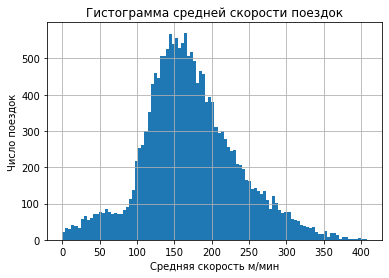

In [29]:
(rides['distance']/rides['duration']).hist(bins=100)
plt.title('Гистограмма средней скорости поездок')
plt.xlabel('Средняя скорость м/мин')
plt.ylabel('Число поездок')

Теперь аномально больших скоростей нет, остались аномально малые. 

In [30]:
rides['duration'].max()

41.0

In [31]:
rides['duration'].min()

3.0

Text(0.5, 1.0, 'Гистограмма времени поездок')

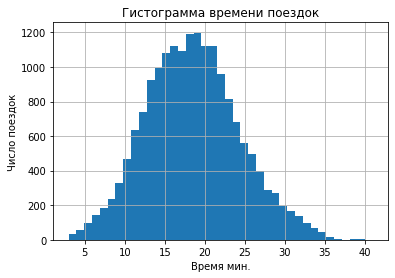

In [32]:
rides['duration'].hist(bins=39)
plt.xlabel('Время мин.')
plt.ylabel('Число поездок')
plt.title('Гистограмма времени поездок')

Text(0.5, 1.0, 'Гистограмма расстояния поездок')

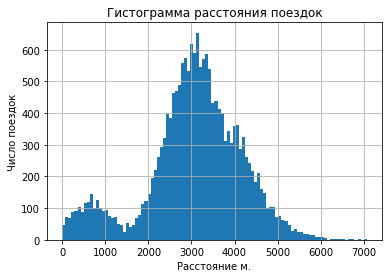

In [33]:
rides['distance'].hist(bins=100)
plt.xlabel('Расстояние м.')
plt.ylabel('Число поездок')
plt.title('Гистограмма расстояния поездок')

Теперь график длительности поездок выглядит нормально. А вот в графике растояния остался странный пик в районе 500м и не нулевое количество совсем коротких поездок. Возможно часть пользователей немогут начать поездку к примеру не разобрались с приложением или аккумулятор разряжен и прочее. 
<font color='blue'>
В таблице пользователей было 2 процента дубликатов.
В таблице поездок были удалены 0.5% аномалий.

In [34]:
(total_users - users.shape[0])/total_users

0.019808306709265176

In [35]:
(total_rides - rides.shape[0])/total_rides

0.005257914545052026

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Отлично! НО важно посчитать какую долю данных мы удалили из датафрейма) 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Лайк) 

##### Вывод

Мы изменили тип данных столбца date	на datetime и выделили отдельно столбец с месяцами, так же удалили дубликаты в таблице users и удалили записи о поездках с невозможно высокой скоростью.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Данные к анализу подготовлены) 

#### Шаг 3. Исследовательский анализ данных

##### Распределение пользователей по городам.

Посмотрим какое распределение пользователей по городам всего и отдельно с подпиской. 

<div class="alert alert-info">
<b>Не очень понимаю почему в 3х графиках снизу есть легенда, а в других графиках ее нет если не писаль `plt.legend()`  </b> 
</div>

Text(0.5, 1.0, 'Зависимость числа пользователей без подписки от города')

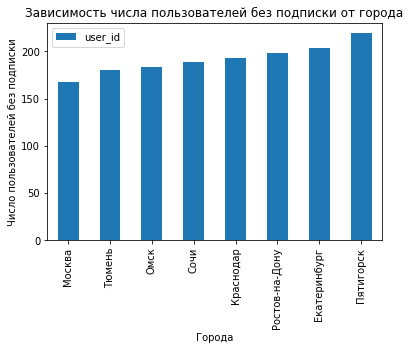

In [36]:
users.pivot_table(index='city',values='user_id',aggfunc='count').sort_values(by='user_id').plot.bar()
plt.xlabel('Города')
plt.ylabel('Число пользователей без подписки')
plt.title('Зависимость числа пользователей без подписки от города')

Text(0.5, 1.0, 'Зависимость числа пользователей с подпиской от города')

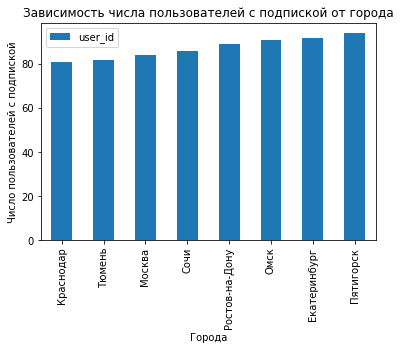

In [37]:
users.loc[users['subscription_type']==True].pivot_table(index='city',values='user_id',aggfunc='count').sort_values(by='user_id').plot.bar()
plt.xlabel('Города')
plt.ylabel('Число пользователей с подпиской')
plt.title('Зависимость числа пользователей с подпиской от города')

Всего пользователей с подпиской и без.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Отлично, но доработаем оформление визуализаций? Необходимо подписать оси и заголовки на русском языке) 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Исправлено!

In [38]:
users.pivot_table(index='subscription_type',values='user_id',aggfunc='count')

,user_id
subscription_type,
False,835
True,699


<font color='blue'> И отобразим результат.

Text(0, 0.5, '')

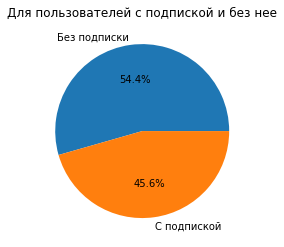

In [46]:
users.pivot_table(index='subscription_type',values='user_id',aggfunc='count')['user_id'].\
plot(kind='pie',labels = ('Без подписки', 'С подпиской'),autopct='%1.1f%%')
plt.title('Для пользователей с подпиской и без нее')
plt.ylabel('')

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Посчитаем доли пользоватлей с подпиской и без? Отразим результат на графике?)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v2 <a class="tocSkip"></h2>
   
<b>На доработку🤔:</b> Необходимо посчитать по данному количеству без разбивки на города) 

<div class="alert alert-success">
<h2> Комментарий ревьюера v3 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Вот теперь согласен) 

<font color='blue'>Посчитаем долю пользователей с подпиской по городам. И отобразим результат.

Text(0.5, 1.0, 'Зависимость доли пользователей с подписой от города')

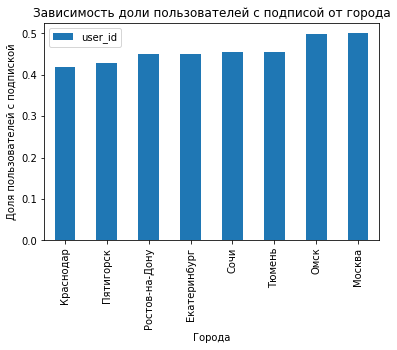

In [445]:
(users.loc[users['subscription_type']==True].pivot_table(index='city',values='user_id',aggfunc='count')/\
users.pivot_table(index='city',values='user_id',aggfunc='count').sort_values(by='user_id'))\
.sort_values(by='user_id').plot.bar()
plt.xlabel('Города')
plt.ylabel('Доля пользователей с подпиской')
plt.title('Зависимость доли пользователей с подписой от города')

Числа по городам довольно близкие.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Необходимо доработать оформление 

<div class="alert alert-info">
<b>Подписи и названия добавил. Оформление графиков это отдельный вид искуства. Если есть еще какие-то рекомендации по оформлению или какие-то красивые/удобные общепринятые фишки - пиши, буду применять)  </b> 
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отправил выше) Но в целом ты верно оформляешь! 

##### Распределение пользователей по возрастам.

Text(0.5, 1.0, 'Распределение пользователей по возрастам')

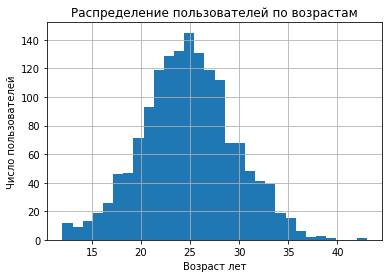

In [446]:
plt.xlabel('Возраст лет')
plt.ylabel('Число пользователей') 
users['age'].hist(bins=30)
plt.title('Распределение пользователей по возрастам')

In [447]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Видимо пользоваться самокатом можно с 12 лет. Средний возраст пользователя 25 лет. Максимальный 43 года.

##### Расстояние за одну поездку

Text(0.5, 1.0, 'Распределение поездок по длине')

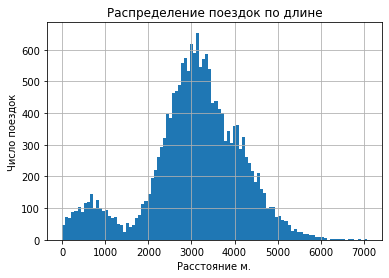

In [448]:
plt.xlabel('Расстояние м.')
plt.ylabel('Число поездок') 
rides['distance'].hist(bins=100)
plt.title('Распределение поездок по длине')

Этот график уже строили выше для поиска аномалий. Тут видно что есть основной пик примерно на 3км, небольшой пик на 500м и слабовыраженый пик на 4км. 

##### Продолжительность поездки

Text(0.5, 1.0, 'Распределение поездок по времени')

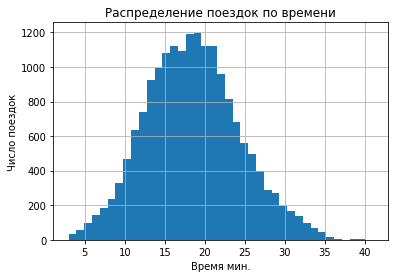

In [449]:
plt.xlabel('Время мин.')
plt.ylabel('Число поездок') 
rides['duration'].hist(bins=39)
plt.title('Распределение поездок по времени')

In [450]:
rides['duration'].describe()

count    17973.000000
mean        18.394981
std          5.979419
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

Распределение времени поездки похоже на нормальное. 

##### Вывод

В этой главе мы построили и изучили
- Распределение всех пользователей и пользователей с подпиской по городам. В каждом из 8 городов 170-200 пользователей и из них 40-50% с подпиской.
- Распределение пользователей по возрастам, которое оказалось близким к нормальному со средним 25 лет.
- Распределение расстояние пройденого за 1 поездку. Оказалось что есть 2 характерных типа поездки: длинная около 3км и короткая около 500м.
- Распределение поездок по длительности, оно оказалось близким к нормальному со средним около 17мин. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Отличное исследование параметров! Молодец, что дополнительно рассматрвиаешь статистику) 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Необходимо доработать оформление всех графиков выше и ниже) 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> исправлено!

#### Шаг 4. Объединение данных

Прежде чем обьеденять таблицы проверим все ли пользователи из одной есть в другой.

In [451]:
print(rides['user_id'].unique().sort()==users['user_id'].unique().sort())

True


In [452]:
data = rides.merge(users)
data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4410.0,26.0,2021-01-01,1,Кира,22,Тюмень,True
1,1,2618.0,16.0,2021-01-18,1,Кира,22,Тюмень,True
2,1,755.0,7.0,2021-04-20,4,Кира,22,Тюмень,True
3,1,2695.0,19.0,2021-08-11,8,Кира,22,Тюмень,True
4,1,4029.0,27.0,2021-08-28,8,Кира,22,Тюмень,True


Посмотрим на следние значения длительности и расстоянии поездки по городам

In [453]:
data.pivot_table(index='city',values=['duration','distance'],aggfunc=['mean','count'])

mean               count         
                   distance   duration distance duration
city                                                    
Екатеринбург    3104.208809  18.384584     2452     2452
Краснодар       3046.450458  18.303797     2291     2291
Москва          3085.515314  18.653949     1861     1861
Омск            3028.723136  18.320910     2066     2066
Пятигорск       3107.307845  18.482278     2511     2511
Ростов-на-Дону  2998.921085  18.221537     2433     2433
Сочи            3042.392349  18.298488     2248     2248
Тюмень          3067.440550  18.549029     2111     2111

Проверим успешность обьединения посчитав элементы.

In [454]:
data.shape[0] == rides.shape[0]

True

In [455]:
len(data['user_id'].unique()) == users.shape[0]

True

<div class="alert alert-info">
<b>Вроде бы достаточная проверка. Если нет , то подскажи как лучше это сделать.</b> 
</div>

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А как бы нам проверить успешность объединения? 

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Окей) 

Данные по городам близки по этому не будем разделять выборку по этому признаку. 
Разделим ее по наличию подписки. <font color='blue'> И выведем первые 5 строчек полученных датафреймов для проверки

In [456]:
data_1 = data.loc[data['subscription_type']==True]
data_1.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
0,1,4410.0,26.0,2021-01-01,1,Кира,22,Тюмень,True
1,1,2618.0,16.0,2021-01-18,1,Кира,22,Тюмень,True
2,1,755.0,7.0,2021-04-20,4,Кира,22,Тюмень,True
3,1,2695.0,19.0,2021-08-11,8,Кира,22,Тюмень,True
4,1,4029.0,27.0,2021-08-28,8,Кира,22,Тюмень,True


In [457]:
data_0 = data.loc[data['subscription_type']==False]
data_0.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type
6500,700,2516.0,15.0,2021-01-02,1,Айдар,22,Омск,False
6501,700,847.0,17.0,2021-02-01,2,Айдар,22,Омск,False
6502,700,4005.0,21.0,2021-02-04,2,Айдар,22,Омск,False
6503,700,1206.0,10.0,2021-02-10,2,Айдар,22,Омск,False
6504,700,3048.0,18.0,2021-02-14,2,Айдар,22,Омск,False


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  А выведем также data_0?
    

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> +++

##### Расстояние поездки

Построим гистограмму расстояния поездки для пользователей с подпиской.

Text(0.5, 1.0, 'Распределение поездок по длине для пользователей с подпиской')

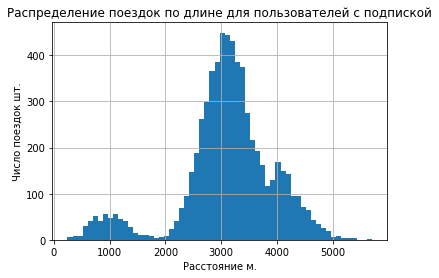

In [458]:
plt.xlabel('Расстояние м.')
plt.ylabel('Число поездок шт.')
data_1['distance'].hist(bins=60)
plt.title('Распределение поездок по длине для пользователей с подпиской')

In [459]:
data_1['distance'].describe()

count    6500.000000
mean     3115.949231
std       836.894838
min       245.000000
25%      2786.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64

Тоже для пользователей без подписки.

Text(0.5, 1.0, 'Распределение поездок по длине для пользователей без подписки')

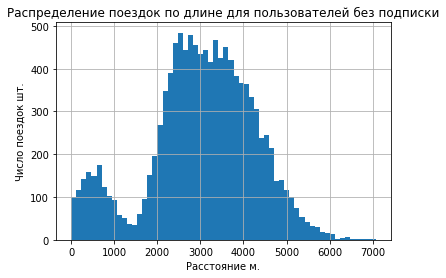

In [460]:
plt.xlabel('Расстояние м.')
plt.ylabel('Число поездок шт.')
data_0['distance'].hist(bins=60)
plt.title('Распределение поездок по длине для пользователей без подписки')

In [461]:
data_0['distance'].describe()

count    11473.000000
mean      3028.871612
std       1235.541036
min          1.000000
25%       2361.000000
50%       3103.000000
75%       3884.000000
max       7067.000000
Name: distance, dtype: float64

<font color='blue'> И тоже на одном графике.

Text(0.5, 1.0, 'Распределение поездок по длине для пользователей с подпиской и без нее')

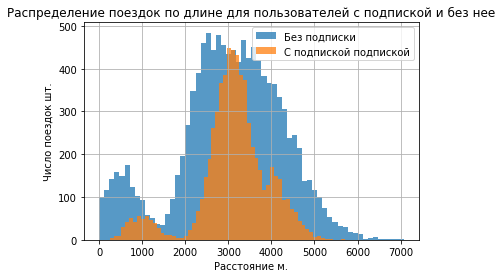

In [462]:
plt.xlabel('Расстояние м.')
plt.ylabel('Число поездок шт.')
data_0['distance'].hist(bins=60, label='Без подписки',alpha=0.75)
data_1['distance'].hist(bins=60, label='С подпиской подпиской',alpha=0.75)
plt.legend()
plt.title('Распределение поездок по длине для пользователей с подпиской и без нее')

Итересно , что у пользователей с подпиской почти нет поездок с расстоянием около 0. Зато есть явный доплнительный пик на 4км.
средняя длина "длинных" поездок и там и там одинакова. "Короткие" в среднем 1км для пользователей с подпиской и 500м без нее. Откуда берутся "короткие" поездки по прежнему непонятно

##### Длительность поездки

Распределение времени поездки для пользователей с подпиской

Text(0.5, 1.0, 'Распределение поездок по времени для пользователей с подпиской')

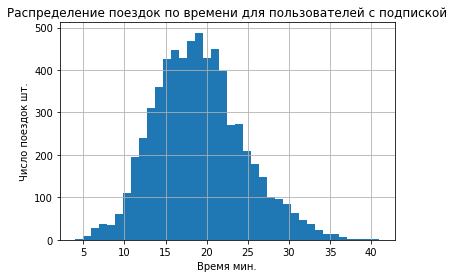

In [463]:
plt.xlabel('Время мин.')
plt.ylabel('Число поездок шт.')
data_1['duration'].hist(bins=38)
plt.title('Распределение поездок по времени для пользователей с подпиской')

In [464]:
data_1['duration'].describe()

count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

Распределение времени поездки для пользователей без подписки

Text(0.5, 1.0, 'Распределение поездок по длине для пользователей без подписки')

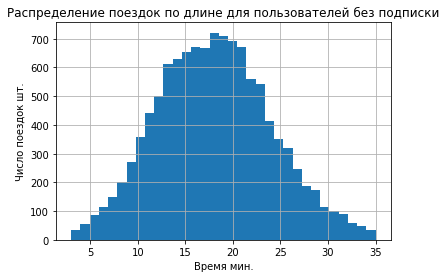

In [465]:
plt.xlabel('Время мин.')
plt.ylabel('Число поездок шт.')
data_0['duration'].hist(bins=33)
plt.title('Распределение поездок по длине для пользователей без подписки')

In [466]:
data_0['duration'].describe()

count    11473.000000
mean        18.030855
std          6.166175
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

<font color='blue'> И оба распределения на одном графике.

Text(0.5, 1.0, 'Распределение поездок по длине для пользователей с подпиской и без нее')

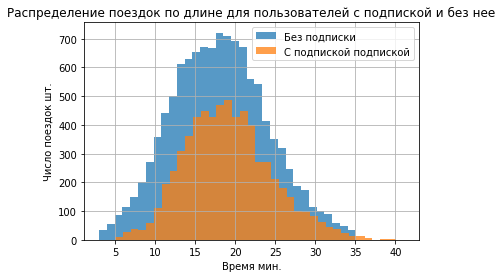

In [467]:
plt.xlabel('Время мин.')
plt.ylabel('Число поездок шт.')
data_0['duration'].hist(bins=33, label='Без подписки',alpha=0.75)
data_1['duration'].hist(bins=38, label='С подпиской подпиской',alpha=0.75)
plt.legend()
plt.title('Распределение поездок по длине для пользователей с подпиской и без нее')

По среднему времени особой разницы между пользователями не видно.

##### Вывод

В этой главе мы объединили данные из таблицы с поездками и таблицы с пользователями. Пользуясь этим выяснили , что поведение пользователей в резных городах похожее и что есть различие в распределении дальности поездки в зависимости от наличия подписки.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Отлично! Но для наглядного сравнения советую совместить распределения) 

#### Шаг 5. Подсчёт выручки

Посчитаем ежемесячную выручку с каждого пользователя. для этого с группируем данные по пользователям и месяцам и для каждой группы посчитаем суммарное время поездки , суммарную длительность и количество поездок.
Для посчета выручки используем формулы 
- длительность$*6+199$ для пользователей с подпиской 
- длительность\*8+число поездок\*50 для пользователей без подписки. 

In [468]:
revenue = data.pivot_table(index=('user_id','month'),values=['duration','distance'],aggfunc=['sum','count'])
revenue = revenue.drop(('count','distance'),axis=1)
revenue.columns = ['distance', 'duration', 'count']
revenue = revenue.reset_index()
revenue = revenue.merge(users[['user_id','subscription_type']])
revenue['income'] = np.where(revenue['subscription_type'],revenue['duration']*6+199,\
                             revenue['duration']*8+revenue['count']*50)
revenue

,user_id,month,distance,duration,count,subscription_type,income
0,1,1,7028.0,42.0,2,True,451.0
1,1,4,755.0,7.0,1,True,241.0
2,1,8,6724.0,46.0,2,True,475.0
3,1,10,5811.0,32.0,2,True,391.0
4,1,11,7005.0,56.0,3,True,535.0
...,...,...,...,...,...,...,...
11295,1534,6,3411.0,26.0,2,False,308.0
11296,1534,8,7623.0,48.0,2,False,484.0
11297,1534,9,4929.0,23.0,1,False,234.0
11298,1534,11,13353.0,78.0,4,False,824.0


In [469]:
revenue.pivot_table(index='subscription_type',values='income',aggfunc=['describe','sum'])

describe                                                   \
                       25%    50%    75%   count     max        mean    min   
subscription_type                                                             
False                194.0  274.0  428.0  6767.0  1444.0  329.332644   74.0   
True                 301.0  337.0  409.0  4533.0   955.0  362.792191  223.0   

                                     sum  
                          std     income  
subscription_type                         
False              183.268419  2228594.0  
True                88.262737  1644537.0

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Выручка посчитана верно) 

#### Шаг 6. Проверка гипотез

##### Длительность поездки

Нулевая гипотеза - длительность поездки клиентов с подпиской и без нее одинакова. Альтернативная гипотеза клиенты с подпиской ездят дольше. Чтобы это проверить посчитаем сначала средние длительности для пользователей обеих категорий.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гипотезы сформулированы верно!

In [470]:
data_0['duration'].mean()

18.030855050989278

In [471]:
data_1['duration'].mean()

19.037692307692307

Далее используем двухвыборочный t-тест для независимых выборок.

In [472]:
alpha = 0.05
result = st.ttest_ind(data_0['duration'],data_1['duration'],alternative='less')
result.pvalue

8.577910347796266e-28

Видно что p-value очень мало. Оставляем альтернативную гипотезу. т.е. пользователи с подпиской тратят больше времени на поездки.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно) 

##### Расстояние поездки.

Оптимальное расстояние поездки 3130м. Нулевая гипотеза - средняя длина поездки пользователей с подпиской равна 3130м. Альтернативная гипотеза следняя длина <font color='blue'> больше 3130.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1 <a class="tocSkip"></h2>

<b>На доработку🤔:</b>  Поскольку оптимальное расстояние по износу составляет 3130 м, значит большее расстояние приводит к повышенному износу самоката. Следовательно, имеет смысл сформулировать альтернативную гипотезу "Подписчики в среднем проезжают расстояние больше оптимального" и соответственно в статистическом тесте использовать параметр alternative = 'greater'"

In [473]:
data_1['distance'].mean()

3115.949230769231

Используем одновыборочный t-тест.

In [474]:
l_ideal=3130
result_2 = st.ttest_1samp(data_1['distance'],l_ideal,alternative='greater')
result_2.pvalue

0.9120422337080507

P-value почти <font color='blue'> 91% </font> что больше стандартных порогов статистической значимости 1% и 5% оставляем нулевую гипотезу. т.е. средняя длина поездки пользователей с подпиской равна 3130м.

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно) 

##### Выручка

Нулевая гипотеза - помесячные выручки от пользователей с подпиской и без равны.Альтернативная гипотеза выручка от пользователей с подпиской больше. Используем двухвыборочный t-тест для независимых выборок

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Гиоптезы сформулировнаы верно 

In [475]:
revenue.loc[revenue['subscription_type']==True]['income'].mean()

362.7921906022502

In [476]:
revenue.loc[revenue['subscription_type']==False]['income'].mean()

329.3326437121324

In [477]:
alpha = 0.05
result = st.ttest_ind(revenue.loc[revenue['subscription_type']==False]['income']\
                      ,revenue.loc[revenue['subscription_type']==True]['income'],alternative='less')
result.pvalue

2.0314113674863288e-30

P-value мало. Отвергаем нулевую гипотезу. т.е. оставляем альтернативную - выручка от пользователей с подпиской больше.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Верно 

##### Число обращений в поддержку.

Нулевая гипотеза - после обновления количество обращений не изменилось. Альтернативная гипотеза - количество обращений  после обновления снизилось. Поскольку у нас 2  выборки одинаковых размеров и они содержат данные для одних и тех же пользователей, то двухвыборочный t-тест для зависимых выборок - ttest_rel(После , До, alternative='less')

##### Вывод

Мы проверили несколько гипотез и в результате остались следующие:
- Пользователи с подпиской тратят больше времени на поездки.
- Средняя длина поездки пользователей с подпиской равна 3130м
- Выручка от пользователей с подпиской больше.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Хорошо!

#### Шаг 7. Распределения

##### Задача 1

У нас есть вероятность успеха p=10% и 1-p вероятность неудачи. Воспользуемся биноминальным распределением. Пусть каждое событие это бернулевское испытание $x_i$  тогда нас интересует $n : P\left(\sum_{i=1}^n x_i\le 99\right) = 0.05 $.
Поскольку число 100 относительно велико можно так же опроксимировать биномиальное распределение нормальным с $\mu=pn$ и $\sigma=\sqrt{p(1-p)n}$. Можно прикинуть что искомое число $np-100 \sim 1.5 \sigma$ или около 1100-1200.

In [478]:
p = 0.1
N = 100
n = 1161
print(st.binom(n , p).cdf(N-1))

0.04976090094990249


Text(0.5, 1.0, 'Распределение вероятности числа продлений прописки.')

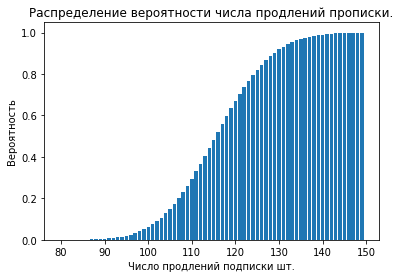

In [479]:
distr = []

min = 80
max = 150

for k in range(min, max):
    current_value = st.binom(n , p).cdf(k)
    distr.append(current_value)

plt.xlabel('Число продлений подписки шт.')
plt.ylabel('Вероятность')    
plt.bar(range(min, max), distr )
plt.title('Распределение вероятности числа продлений прописки.')

In [480]:
n = 1158
print(st.norm(n*p, math.sqrt((1-p)*p*n)).cdf(N-1))


0.04991937389843044


Нарисуем относительную ошибку замены одного распределения другим.

Text(0.5, 1.0, 'Распределение относительной разности нормального и биномиального распределения')

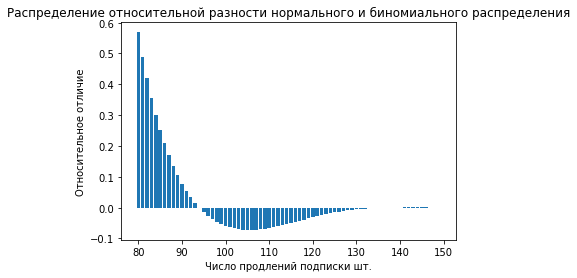

In [481]:
distr = []

for k in range(min, max):
    current_value = (st.norm(n*p, math.sqrt((1-p)*p*n)).cdf(k) - st.binom(n , p).cdf(k))/st.binom(n , p).cdf(k)
    distr.append(current_value)

plt.ylabel('Относительное отличие')
plt.xlabel('Число продлений подписки шт.')    
plt.bar(range(min, max), distr)
plt.title('Распределение относительной разности нормального и биномиального распределения')

Видно, что разница между биномиальным и нормальным распределением есть,но она мала <font color='blue'> в интересующем диапазоне.

##### Задача 2

Ситуация схожая с предыдущей,но уже выборка большая $n=1000000$. Есть смысл использовать апроксимацию биномиального распределения нормальным. Вероятность успеха примерно $p=0.4$, неудачи $1-p$ следовательно $\mu=pn$ и $\sigma=\sqrt{p(1-p)n}$. Ишем величину $P\left(\mathbb{N}(\mu,\sigma)<399500\right)$

In [482]:
p = 0.40
n = 1000000
n_desired = 399500
print(st.norm(n*p, math.sqrt((1-p)*p*n)).cdf(399500))

0.15371708296369768


Вероятность этого события 15%. Но посмотрим теперь насколько это полезный расчет. В условии сказано что вероятность около 40%. 40.1% и 39.9% это тоже около 40%

In [483]:
p = 0.401
n = 1000000
n_desired = 399500
print(st.norm(n*p, math.sqrt((1-p)*p*n)).cdf(399500))

0.0011044936265442765


In [484]:
p = 0.399
n = 1000000
n_desired = 399500
print(st.norm(n*p, math.sqrt((1-p)*p*n)).cdf(399500))

0.8463842410381544


In [485]:
p = 0.4001
n = 1000000
n_desired = 399500
print(st.norm(n*p, math.sqrt((1-p)*p*n)).cdf(399500))

0.11034529249656272


In [486]:
p = 0.3999
n = 1000000
n_desired = 399500
print(st.norm(n*p, math.sqrt((1-p)*p*n)).cdf(399500))

0.20709835881336486


Таким образом ошибка в вероятности успеха даже порядка 0.1% приводит к тому что ответ может меняться в больших пределах.

##### Выводы

- Для того чтобы подписку продлило не меньше 100 человек с вероятностью 95% нужно разослать не меньше 1160 промокодов.
- При текущих входных данных вопрос некорректный. Для ответа с точностью хотя бы 30% , нужна точность вероятности открытия письма 4-5 знаков.( Если провести расчет считая данные точными,то вероятность того что откроют 399500 и меньше составляет 15%  )  

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Респект за доп.исследование!

#### Вывод

    Был проведен анализ выборки данных о пользователях самокатов и их поездках.
В начале проведена предоброботка данных, изменены типы данных, удалены дубликаты и аномалии.
Затем были описана и визуализирована информация о пользователях (город , возраст)  и их поездках( длительность, расстояние)
Обьединив информацию о поездках и пользователях было замечено что распределение расстояния за поездку заметно отличается для прользователей с подпиской и без нее. Следующим шагом была посчитана ежемесечная выручка от каждого пользовотеля.
Используя эти данные были проверены и неотвергнуты 3 гипотезы.
- Пользователи с подпиской тратят больше времени на поездки.
- Средняя длина поездки пользователей с подпиской равна 3130м
- Выручка от пользователей с подпиской больше.

Дальнейшего изучения требует причина наличия 2 разных типов поездок ("короткие", "длинные") ,а так же причина возникновения странных поездок с длительностью 0.5мин.


<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
Андрей, спасибо за  проект! Ты приложил много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты большой молодец!
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Отличные визуализации
    
    3. На разных шагах проекта ты предлагал очень интересные решения и методы для их реализации. Хорошая работа!
    
    
**На что стоит обратить внимание**:
    
    1. Оформление визуализаций
    
    
**Удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v2**:
Андрей, исправим оставшиеся замечания и проект будет зачтен) 

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера v3**:
Андрей, ошибки исправлены, проект принят, поздравляю тебя! Успешной учебы и еще увидимся в Практикуме!